# Solve a basic optimal control problem with Gekko.

Simon Zuzek - 30/03/2021

If gekko is not installed, run ``pip install gekko`` in your shell.

In [ ]:
# !pip install gekko

In [ ]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Sources:

https://apmonitor.com/wiki/index.php/Main/GekkoPythonOptimization

https://www.youtube.com/watch?v=egQAKdJsu7E&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=11

We solve the following problem:

$$ min_u \frac{1}{2} \int_0^{2} x_1^2(t) dt $$

subject to

$$ \frac{dx_1}{dt} = u $$

$$ x_1(0) = 1 $$

$$ -1 \leq u(t) \leq 1 $$

In order to solve this with *GEKKO*, we need to transform the objective.
Define $x_2(t_f)$ as the objective, and specifiy that $x_2(t)$
increments at the rate of $\frac{1}{2}x_1^2(t)$.

The problem is therefore equivalently

$$ min_u x_2(t_f) dt $$

subject to

$$ \frac{dx_1}{dt} = u $$

$$ \frac{dx_2}{dt} = \frac{1}{2} x_1^2(t) $$

$$ t_f = 2 $$

$$ x_1(0) = 1 $$

$$ -1 \leq u(t) \leq 1 $$



# Setup and Solve

First, intialize a Gekko model and a grid.

In [ ]:
m = GEKKO() # initialize gekko
nt = 101 # number of points
m.time = np.linspace(0,2,nt) # equally spaced 0 and 2

**Define Variables**

value -- initialized value. Defaults to 0. Should not matter if the variable is actually solved for.
lb -- a lower bound
ub -- an upper bound

In [ ]:
# Variables
x1 = m.Var(value=1)
x2 = m.Var(value=0)
u = m.Var(value=0,lb=-1,ub=1)


Set the final parameter - zero everywhere except one at the last point of the grid

In [ ]:
p = np.zeros(nt) # mark final time point
p[-1] = 1.0
final = m.Param(value=p)

**Equations**

In [ ]:
# Equations
m.Equation(x1.dt()==u)
m.Equation(x2.dt()==0.5*x1**2)

**Objective Function**

This is where final is needed, so that only the last value of $x_2$ is taken


In [ ]:
m.Obj(x2*final) # Objective function

**Change the solver mode**

IMODE = 6 ... continuous time optimization

disp=False ... do not display the solution

In [ ]:
m.options.IMODE = 6 # optimal control mode
m.solve(disp=True) # solve

apm 130.60.140.83_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:            500
 Number of total equations: -          400
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

# Plot Results

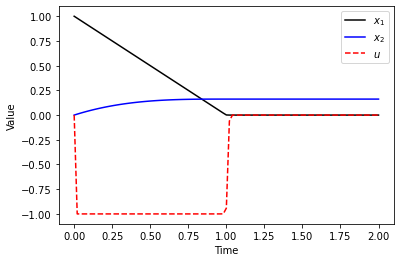

In [ ]:
plt.figure(1) # plot results
plt.plot(m.time,x1.value,'k-',label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',label=r'$x_2$')
plt.plot(m.time,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Export as .html

In [ ]:
!jupyter nbconvert --to html gekko.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook gekko.ipynb to html
[NbConvertApp] Writing 593206 bytes to gekko.html
